# Impot Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'matplotlib'

# Data set
Link : https://github.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/blob/master/car_data.csv

In [7]:
df = pd.read_csv('/content/sample_data/car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df.ndim

2

In [10]:
df.shape

(4340, 8)

In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [12]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [14]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [19]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
# create a column new_fuel and place it index fuel column 
# Replace the values
# petrol - 0
# diesel - 1
# CNG - 2
# lpg - 3
# Electric - 4

x = df.fuel.replace({"Petrol":0, "Diesel":1, "CNG":2, "LPG":3, "Electric":4})
df.insert(4, 'new_fuel',x)

In [30]:
df1.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [24]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [39]:
# create a column new_seller_type and place it index fuel column 
# Replace the values
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2

x = df.seller_type.replace({"Individual":0, "Dealer":1, "CNG":2, "Trustmark Dealer":3})
df.insert(df.columns.get_loc('seller_type'), 'new_seller_type',x)

In [41]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [42]:
new_df = df.copy()

In [43]:
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'new_seller_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [49]:
new_df = df[['fuel','seller_type']]

In [50]:
new_df

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual
...,...,...
4335,Diesel,Individual
4336,Diesel,Individual
4337,Petrol,Individual
4338,Diesel,Individual


In [52]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
new_df['fuel'] = LabelEncoder().fit_transform(new_df['fuel'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
new_df['fuel'].unique()

array([4, 1, 0, 3, 2])

In [57]:
new_df.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df)

OneHotEncoder(handle_unknown='ignore')

In [64]:
enc_df = pd.DataFrame(enc.fit_transform(new_df[['seller_type']]).toarray())

In [67]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4335,0.0,1.0,0.0
4336,0.0,1.0,0.0
4337,0.0,1.0,0.0
4338,0.0,1.0,0.0


In [69]:
# To perfrom one hot encoding pandas has inbuilt function
# new_df = pd.get_dummies(new_df)

In [72]:
df.drop('new_fuel', axis=1, inplace=True)
df.drop('new_seller_type', axis=1, inplace=True)

In [73]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [78]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [79]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [80]:
# Create a column no_of_years = curent_year - year
df['no_of_years'] = 2022 - df['year']

In [83]:
# drop columns - name, year
df.drop(['year','name'], axis=True, inplace=True)

In [90]:
# Rename selling_price to current_selling_price
df.rename(columns={'selling_price':'current_selling_price'}, inplace=True)

In [91]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,15
1,135000,50000,4,1,1,0,15
2,600000,100000,1,1,1,0,10
3,250000,46000,4,1,1,0,5
4,450000,141000,1,1,1,2,8


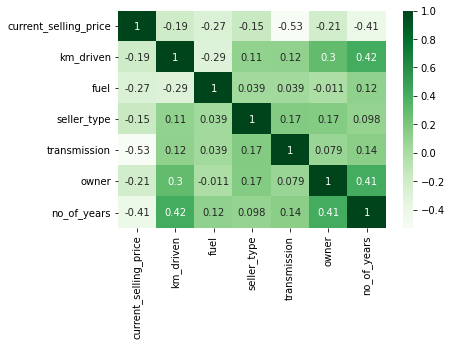

In [95]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

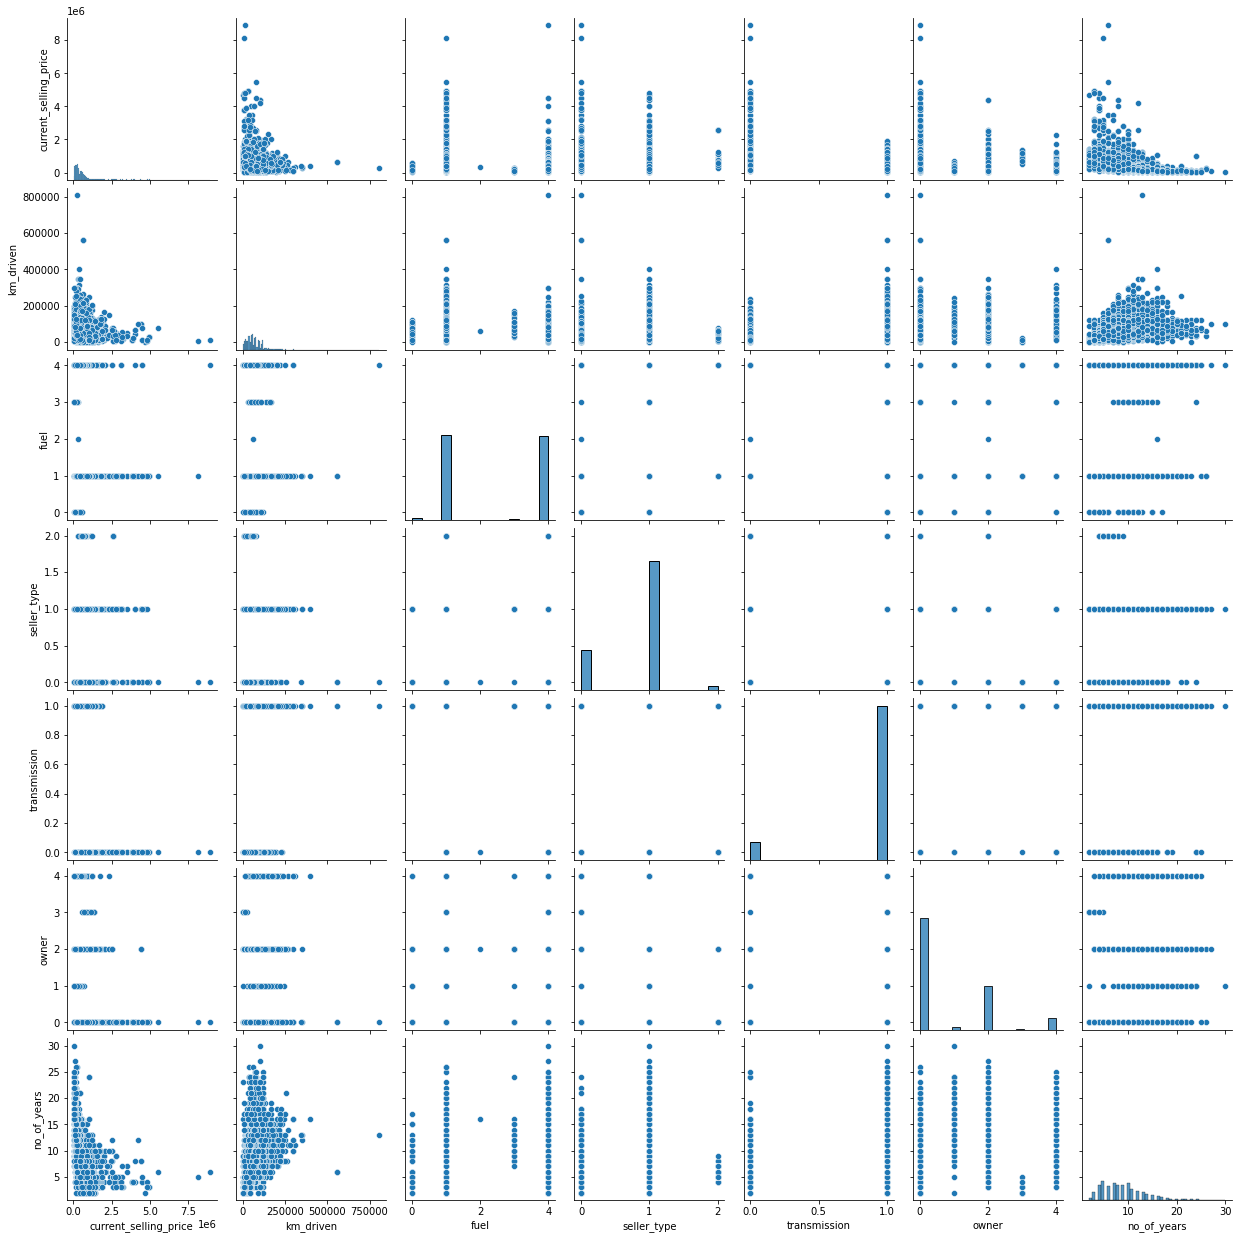

In [96]:
sns.pairplot(df)

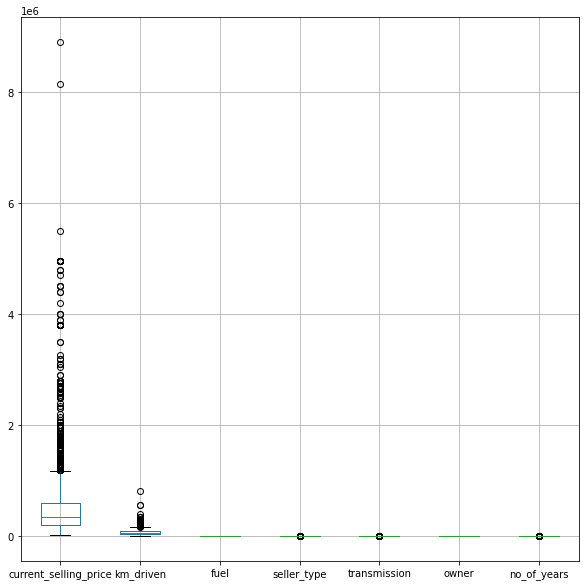

In [98]:
plt.figure(figsize=(10,10))
df.boxplot()

# Select the features and targets

In [99]:
x = np.array(df.drop('current_selling_price', axis=1))
y = np.array(df.current_selling_price)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=(0.2))  

In [101]:
regressor = DecisionTreeRegressor()

In [102]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [103]:
y_pred = regressor.predict(x_test)

In [104]:
target = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [105]:
target

,Actual,Predicted
0,140000,1.960000e+05
1,120000,1.000000e+05
2,200000,2.628332e+05
3,2700000,2.716667e+06
4,520000,9.500000e+05
...,...,...
863,975000,8.150000e+06
864,65000,1.312500e+05
865,250000,8.750000e+05
866,350000,3.955556e+05


Text(0.5, 1.0, 'Actual v/s Predicted')

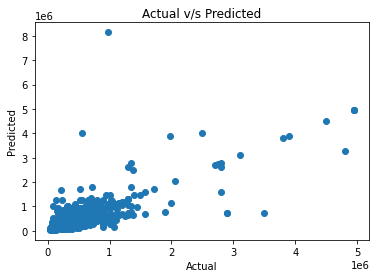

In [106]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')

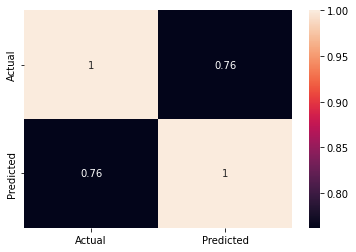

In [109]:
sns.heatmap(target.corr(), annot=True)

In [110]:
r2_score(y_test, y_pred)

0.4529298885668005